# Car Price Prediction::

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# load the csv file 

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

In [2]:
car_price = pd.read_csv('CarPrice_Assignment.csv')
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
print(f'shape of car price --> {car_price.shape} ')

shape of car price --> (205, 26) 


In [4]:
car_price.columns # check the columns name

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# check the null values

In [5]:
car_price.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# check numercial and non-numerical columns 

In [6]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## convert non-numerical values into numerical values

In [7]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
car_price.fueltype = labelencoder.fit_transform(car_price.fueltype)
car_price.aspiration = labelencoder.fit_transform(car_price.aspiration)
car_price.carbody = labelencoder.fit_transform(car_price.carbody)
car_price.drivewheel = labelencoder.fit_transform(car_price.drivewheel)
car_price.enginelocation = labelencoder.fit_transform(car_price.enginelocation)
car_price.fuelsystem = labelencoder.fit_transform(car_price.fuelsystem)
car_price.doornumber = car_price.doornumber.map({'two':2, 'four':4})

In [8]:
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,2,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,4,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,4,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int32  
 4   aspiration        205 non-null    int32  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    int32  
 7   drivewheel        205 non-null    int32  
 8   enginelocation    205 non-null    int32  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# check correlation between columns

In [1]:
corrmat = car_price.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))
g = sns.heatmap(car_price[top_corr_features].corr(),annot = True, cmap='RdYlGn')

NameError: name 'car_price' is not defined

## Select the columns for model input 

In [11]:
data = car_price[['horsepower', 'boreratio', 'enginesize', 'curbweight', 'carwidth', 
                  'carlength','wheelbase','drivewheel','price','enginelocation']]

In [12]:
data.head()

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,price,enginelocation
0,111,3.47,130,2548,64.1,168.8,88.6,2,13495.0,0
1,111,3.47,130,2548,64.1,168.8,88.6,2,16500.0,0
2,154,2.68,152,2823,65.5,171.2,94.5,2,16500.0,0
3,102,3.19,109,2337,66.2,176.6,99.8,1,13950.0,0
4,115,3.19,136,2824,66.4,176.6,99.4,0,17450.0,0


## check the data type of columns 

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   horsepower      205 non-null    int64  
 1   boreratio       205 non-null    float64
 2   enginesize      205 non-null    int64  
 3   curbweight      205 non-null    int64  
 4   carwidth        205 non-null    float64
 5   carlength       205 non-null    float64
 6   wheelbase       205 non-null    float64
 7   drivewheel      205 non-null    int32  
 8   price           205 non-null    float64
 9   enginelocation  205 non-null    int32  
dtypes: float64(5), int32(2), int64(3)
memory usage: 14.5 KB


# split the data for training and testing

In [57]:
x = data.loc[:,data.columns != 'price']
y = data.loc[:, data.columns == 'price']

from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(x, y, test_size = 0.30, random_state=32)

In [58]:
print(f'shape of x_train --> {train_data.shape} \nshape of x_test --> {test_data.shape}')

shape of x_train --> (143, 9) 
shape of x_test --> (62, 9)


# convert into tensor

In [59]:
train_data = np.asarray(train_data).astype("float32")
test_data = np.asarray(test_data).astype("float32")
train_target = np.asarray(train_target).astype("float32")
test_target = np.asarray(test_target).astype("float32")

# Preparing the data

## Normalization

In [60]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -=mean
test_data /= std

In [61]:
y_mean = train_target.mean(axis=0)
train_target-= y_mean
y_std = train_target.std(axis=0)
train_target /= y_std

test_target -= y_mean
test_target /= y_std

# Make a model:

In [62]:
def build_model():
    model = Sequential()
    model.add(Dense(10, activation = 'relu', input_shape = (train_data.shape[1],)))
    model.add(Dense(8, activation = 'relu'))
    model.add(Dense(6, activation = 'relu'))
    model.add(Dense(1))
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
    return model

# K-fold validation

In [63]:
k = 4
num_epochs = 30
num_val_samples = len(train_data) // 4 
all_mae_histories = []
all_train_mae_histories = []
# K-fold validation
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_target = train_target[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                         train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_target = np.concatenate([train_target[:i * num_val_samples], 
                                            train_target[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    
    history = model.fit(partial_train_data, partial_train_target, 
                        validation_data=(val_data, val_target),
                        epochs=num_epochs, batch_size=16)
    
    mae_history = history.history['val_mae']
    train_mae_history = history.history['mae']
    all_mae_histories.append(mae_history)
    all_train_mae_histories.append(train_mae_history)

processing fold # 0
Epoch 1/30
7/7 [==============================] - 1s 30ms/step - loss: 0.6448 - mae: 0.7331 - val_loss: 0.5105 - val_mae: 0.5766
Epoch 2/30
7/7 [==============================] - 0s 6ms/step - loss: 0.5242 - mae: 0.6558 - val_loss: 0.4751 - val_mae: 0.5605
Epoch 3/30
7/7 [==============================] - 0s 6ms/step - loss: 0.4653 - mae: 0.6153 - val_loss: 0.4511 - val_mae: 0.5526
Epoch 4/30
7/7 [==============================] - 0s 6ms/step - loss: 0.4244 - mae: 0.5850 - val_loss: 0.4355 - val_mae: 0.5493
Epoch 5/30
7/7 [==============================] - 0s 6ms/step - loss: 0.3935 - mae: 0.5624 - val_loss: 0.4231 - val_mae: 0.5455
Epoch 6/30
7/7 [==============================] - 0s 6ms/step - loss: 0.3658 - mae: 0.5427 - val_loss: 0.4166 - val_mae: 0.5439
Epoch 7/30
7/7 [==============================] - 0s 6ms/step - loss: 0.3406 - mae: 0.5221 - val_loss: 0.4088 - val_mae: 0.5405
Epoch 8/30
7/7 [==============================] - 0s 6ms/step - loss: 0.3185 - mae:

# Building the history of successive mean K-fold training and validation scores

In [64]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
average_train_mae = [np.mean([x[i] for x in all_train_mae_histories]) for i in range(num_epochs)]

# Plotting Training and Validation Graph

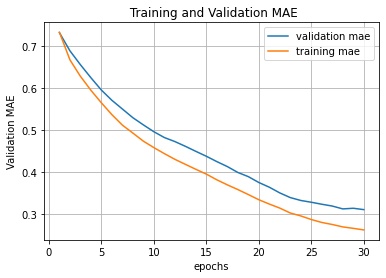

In [65]:
plt.plot(range(1, len(average_mae_history) + 1),average_mae_history, label = 'validation mae')
plt.plot(range(1, len(average_train_mae) + 1),average_train_mae, label = 'training mae')
plt.title(' Training and Validation MAE')
plt.xlabel('epochs')
plt.ylabel('Validation MAE')
plt.legend()
plt.grid()
plt.show()

# Evaluate the model

In [66]:
model.evaluate(test_data,test_target)

2/2 [==============================] - 0s 3ms/step - loss: 0.1635 - mae: 0.2601


[0.1635328233242035, 0.260102242231369]

# Predict the price

In [67]:
result = model.predict(test_data)

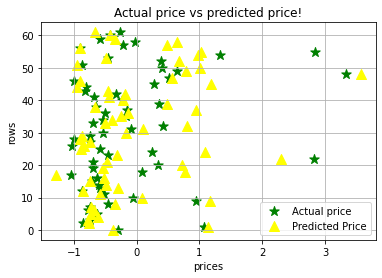

In [68]:
plt.scatter(test_target, range(62), marker = '*', color = 'green', label = 'Actual price', s = 100)
plt.scatter(result, range(62), marker = '^', color = 'yellow', label = 'Predicted Price', s = 100)
plt.title('Actual price vs predicted price!')
plt.xlabel('prices')
plt.ylabel('rows')
plt.legend()
plt.grid()
plt.show()